## Data transformation

### Remover duplicados

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


La función `drop_duplicates()` permite eliminar registros duplicados ya sea que el valor este duplicado en toda la fila o en alguna/s de las columnas.


In [3]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [5]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [6]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


### Mapear y transformar los datos

A partir de un diccionario, se puede crear una nueva columna para un Dataframe donde las claves del mismo se vinculen con una de las series y los valores formen parte de la nueva columna. 

In [7]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [8]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [9]:
# La función map() puede recibir un diccionario y transforma el parámetro que recibe de la clave en el valor
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [10]:
# Podemos hacer esto mismo más explícitamente con expresiones lambda.
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Reemplazar valores

El método `data.replace()` ofrece varias formas de efectuar reemplazos sobre una serie de Pandas
    1- Un valor viejo por un valor nuevo
    2- Una lista de valores viejos por un valor nuevo
    3- Una lista de valores viejos por una lista de valores nuevos
    4- Un diccionario que mapee valores nuevos y viejos


In [11]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [12]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [13]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [14]:
data.replace([-999, -1000], [0, np.nan])

0    1.0
1    0.0
2    2.0
3    0.0
4    NaN
5    3.0
dtype: float64

In [15]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renombrar el índice de los ejes 

Recordemos que los objetos de tipo Index se comportan como las tuplas: son inmutable. Por esta razón no puedo modificar directamente uno de sus elementos como sí puedo hacer con los valores de los Dataframe y Series.

¿Cómo hacemos entonces para cambiar el nombre de una única columna?

Em método `rename()` acepta un diccionario para cada eje donde las keys son los valores viejos y los values son los valores nuevos.


In [16]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [17]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [18]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [19]:
# La función title hace que las palabras se vean en mayúscula, seguida de minúsculas.

data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [20]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [21]:
# Siempre devuelve una referencia al DataFrame, aunque no quiera utilizarla. Notar el nombre que se le asigna.

data.rename(index={'INDIANA': 'NEVADA'}, inplace=True)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretizar y binarizar

El proceso de transformar una variable numérica en categórica se llama discretización. 

In [22]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [23]:
# La función 'cut' devuelve el intervalo abierto al que pertenece cada entrada
# Defino el intervalo previamente

bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [24]:
# El resultado de pd.cut devuelve un objeto de la clase Categorical.
type(cats)

pandas.core.categorical.Categorical

In [25]:
# 'codes' devuelve el indice del intervalo al que pertenece cada entrada
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [26]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [27]:
# El intervalo se puede definir semicerrado o semiabierto.

pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [28]:
# Asigno nombres a los interavlos

group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
serie_ages = pd.cut(ages, bins, labels=group_names)

In [29]:
serie_ages.value_counts()

MiddleAged    3
Senior        1
YoungAdult    3
Youth         5
dtype: int64

### Detectar y filtrar outliers

La definición estándar de "outlier", indica que son outliers todos aquellos valores que se encuentran más de 3 desvíos estándar por encima o por debajo de su media. 

In [32]:
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(1000, 4))
data.sample(5)

,0,1,2,3
565,1.502867,-1.400992,1.105131,-1.123506
193,2.666744,1.451456,0.634629,-0.502827
333,0.718409,-1.929776,2.527939,0.731370
767,-0.017749,-1.595617,-1.387784,0.327248
576,-0.442164,1.284845,0.801260,1.025196


In [33]:
# Detectamos para una serie, todos los valores que se encuentran a más de 3 desvíos estándar.
col = data[3]
col[np.abs(col) > 3 * np.std(col)]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [34]:
# Para ver los outliers en todo el Dataframe
data.apply(lambda col:col[np.abs(col) > 3 * np.std(col)])

,0,1,2,3
5,NaN,NaN,3.248944,NaN
97,NaN,NaN,NaN,3.927528
102,NaN,NaN,3.176873,NaN
305,NaN,NaN,NaN,-3.399312
324,NaN,NaN,3.260383,NaN
326,NaN,-2.989741,NaN,NaN
400,NaN,NaN,NaN,-3.745356
499,NaN,NaN,-3.056990,NaN
523,-3.428254,NaN,NaN,NaN
586,NaN,NaN,-3.184377,NaN


### Variables Dummies

La utilización de variables dummies, también conocida como "one hot encoding", se puede interpretar como el proceso inverso de la discretización.
En este caso tomamos variables categóricas y las transformamos en variables numéricas que siguen una distribución binomial con probabilidad p, donde p es la cantidad de veces que aparece la categoría sobre el total de datos.

Pandas cuenta con el método pd.get_dummies() que recibe una Serie o una lista de Series y realiza el one hot encoding.

Recordemos que una variable con k categorías se puede representar con k-1 variables. 

Por eso un parámetro clave de pd.get_dummies es ```drop_first = True``` que genera k-1 categorías en lugar de k. 


In [41]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [42]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [43]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../Data/movies.csv', sep=';', header=None,
                        names=mnames, encoding='latin1')
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [44]:
# set crea una colección desordenada de elementos no repetidos
# Usamos set en el contexto de una lista por comprensión.

genre_iter = (set(x.split('|')) for x in movies.genres)

# Genero una lista a partir de todos los elementos del conjunto.
genres = sorted(set.union(*genre_iter))
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [46]:
# Inicializamos en ceros todos los géneros.
dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Recorremos la columna original de géneros y asignamos 1 con fancy indexing a los que corresponden.
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1

In [51]:
# Unimos el dataframe original con el que contiene las dummies
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

## Manipulación de strings

### String object methods

Veamos algunos métodos de manipulación de Strings

##### Split y Join

In [52]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [53]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [54]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [55]:
'::'.join(pieces)

'a::b::guido'

In [56]:
'guido' in val

True

In [57]:
# Devuelve la posición más baja donde encuentra el patrón solicitado.
val.index(',')

1

In [58]:
# Devuelve -1 si no la encuentra
val.find(':')

-1

In [59]:
# Este método en cambio, devuelve un ValueError

val.index(':')

ValueError: substring not found

In [60]:
val.count(',')

2

In [61]:
val

'a,b,  guido'

In [62]:
val.replace(',', '::')

'a::b::  guido'

In [63]:
val.replace(',', ' ')

'a b   guido'

## Example: USDA Food Database

In [65]:
import json
import pandas as pd
db = json.load(open('../Data/foods.json'))
len(db)

6636

In [66]:
# Recibimos datos nutricionales de 6636 productos.
db[0:1]

[{'description': 'Cheese, caraway',
  'group': 'Dairy and Egg Products',
  'id': 1008,
  'manufacturer': '',
  'nutrients': [{'description': 'Protein',
    'group': 'Composition',
    'units': 'g',
    'value': 25.18},
   {'description': 'Total lipid (fat)',
    'group': 'Composition',
    'units': 'g',
    'value': 29.2},
   {'description': 'Carbohydrate, by difference',
    'group': 'Composition',
    'units': 'g',
    'value': 3.06},
   {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
   {'description': 'Energy',
    'group': 'Energy',
    'units': 'kcal',
    'value': 376.0},
   {'description': 'Water',
    'group': 'Composition',
    'units': 'g',
    'value': 39.28},
   {'description': 'Energy',
    'group': 'Energy',
    'units': 'kJ',
    'value': 1573.0},
   {'description': 'Fiber, total dietary',
    'group': 'Composition',
    'units': 'g',
    'value': 0.0},
   {'description': 'Calcium, Ca',
    'group': 'Elements',
    'units': 'mg',
    'value': 673.

In [67]:
# Cada producto es un diccionario. Veamos la información asociada a cada uno.
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [68]:
# A su vez la propiedad nutrientes, es un objeto con otras propiedades.
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [69]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [70]:
# Creo un dataframe seleccionando únicamente una parte de las propiedades originales.
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

In [71]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [72]:
info.sample(20)

,description,group,id,manufacturer
2809,"SILK Coffee, soymilk",Legumes and Legume Products,16249,WhiteWave Foods Company
3625,"Puddings, rice, dry mix",Sweets,19194,
5209,"Garlic, raw",Vegetables and Vegetable Products,11215,
5560,"Beef, round, bottom round, steak, separable le...",Beef Products,13407,
4261,"McDONALD'S, Deluxe Warm Cinnamon Roll",Fast Foods,21318,McDonald's Corporation
5466,"Tomatoes, red, ripe, canned, packed in tomato ...",Vegetables and Vegetable Products,11885,
2011,"Parsley, freeze-dried",Vegetables and Vegetable Products,11625,
820,"Cereals ready-to-eat, KELLOGG, KELLOGG'S COMPL...",Breakfast Cereals,8028,"Kellogg, Co."
1848,"Asparagus, canned, drained solids",Vegetables and Vegetable Products,11015,
2267,"Seeds, sunflower seed flour, partially defatted",Nut and Seed Products,12041,


In [73]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [ ]:
pd.value_counts(info.manufacturer)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


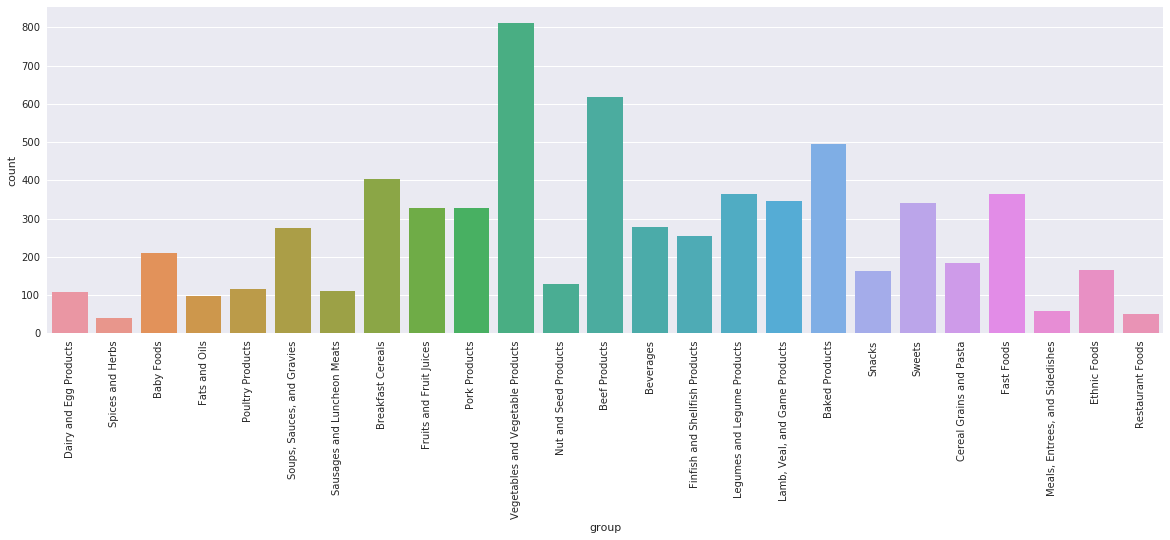

In [82]:
# Ahora queremos graficar la importancia de los distintos grupos
% matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,6))
graph = sns.countplot(x="group", data=info)
graph.set_xticklabels(info.group.unique(),rotation=90)
plt.show()

** Seleccionando la información **

La mejor forma de mostrar los conteos de categorías es con un gráfico de barras.
Pero ¿qué pasa si tengo demasiadas categorías?
Puedo elegir representar únicamente las primeras...

In [83]:
top_manufacturers = info.manufacturer.dropna().value_counts()

top_manufacturers[0:10]

                           4132
Campbell Soup Co.           203
Kellogg, Co.                189
The Quaker Oats, Co.         98
McDonald's Corporation       84
General Mills Inc.           56
Masterfoods USA              38
Archway Cookies              36
Hershey Food Corp.           32
WhiteWave Foods Company      28
Name: manufacturer, dtype: int64

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


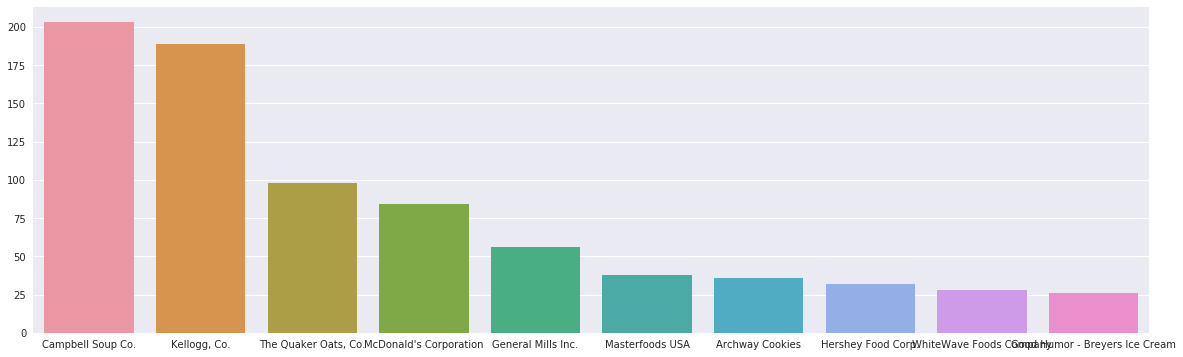

In [84]:
plt.figure(figsize=(20,6))
sns.barplot(top_manufacturers[1:11].index, top_manufacturers[1:11].values)
plt.show()